In [32]:
import tweepy
import re
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import time
from tweepy import TooManyRequests

In [34]:
# Replace these with your own Twitter API keys
api_key = 'DIVtBqINU3qtx8xfs7bsRA53m'
api_secret_key = 'oJUH7oq7wEX2b7BTOtCzcWKnNF60dha9cizbqSdEUO3yUajFW4'
access_token = '1847944458232578048-eacQdWJQcWpNWOAtMGcJoes9y08oIr'
access_token_secret = 'luAHv59KaBdl2dS2DT8DDrLS2QAIUNl0nXRO1T619lAsd'

In [36]:
# Authenticate to Twitter
auth = tweepy.OAuth1UserHandler(api_key, api_secret_key, access_token, access_token_secret)
api = tweepy.Client(auth)

In [38]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAMDyxAEAAAAAjTnRvxlV7SyRPH6cNbFilVUXWlI%3DHUcXmodPTRA7BoIqyUUh8shKIqjiThYIF7USpb68cIZUN0ovaN"
client = tweepy.Client(bearer_token=bearer_token)

In [40]:
# Fetch tweets containing a specific keyword
query = "Python programming"
tweets = client.search_recent_tweets(query, max_results=100, tweet_fields=['lang', 'text'])

In [42]:
# Preprocess tweets
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    tweet_tokens = tweet.split()
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    return " ".join(filtered_words)

# Preprocess tweets
preprocessed_tweets = [preprocess_tweet(tweet.text) for tweet in tweets.data if tweet.text]

In [46]:
# Perform sentiment analysis
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"

sentiments = [get_sentiment(tweet) for tweet in preprocessed_tweets]


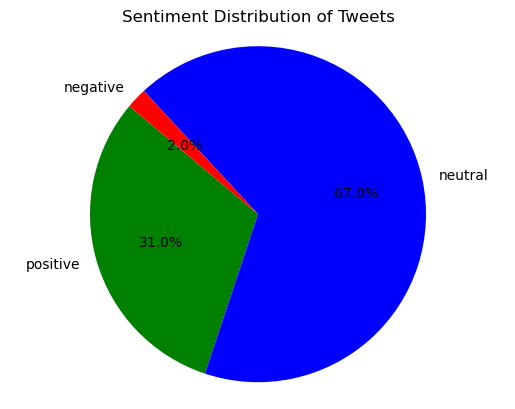

In [48]:
# Visualize sentiment distribution
sentiment_counts = {
    "positive": sentiments.count("positive"),
    "neutral": sentiments.count("neutral"),
    "negative": sentiments.count("negative")
}

labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['green', 'blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Sentiment Distribution of Tweets")
plt.show()